<a href="https://colab.research.google.com/github/Shenieceb/python-api-challenge/blob/main/WeatherPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [9]:
!pip install citipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 675.6/675.6 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for citipy: filename=citipy-0.0.6-py3-none-any.whl size=675966 sha256=17d8530fc3e21b8c3501f15b5bc7ba556df237e74ef2c8d7a99dd103839ba47b
  Stored in directory: /root/.cache/pip/wheels/41/82/37/8bb56372b0d828d226b83e0117780ecbe9f409100ac52364bd
Successfully built citipy


In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
#from api_keys import weather_api_key

weather_api_key ="92b0172d76e0cc59cd47a57d3cee9bb1"

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy



### Generate the Cities List by Using the `citipy` Library

In [ ]:
!pip install citipy

In [11]:
from citipy import citipy

In [12]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [18]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather'
units='metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units={units}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | novyy urgal
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 5 of Set 1 | phan rang-thap cham
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | macapa
Processing Record 9 of Set 1 | maloye ganyushkino
Processing Record 10 of Set 1 | tejen
Processing Record 11 of Set 1 | west island
Processing Record 12 of Set 1 | bilibino
Processing Record 13 of Set 1 | iqaluit
Processing Record 14 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 15 of Set 1 | shizukuishi
Processing Record 16 of Set 1 | loukhi
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | nikolayevsk-on-amure
Processing Record 19 of Set 1 | jamaame
Processing Record 20 of Set 1 | al fqih ben calah
Processing R

In [19]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [20]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,novyy urgal,51.0736,132.5642,16.99,56,64,1.20,RU,1719266683
1,grytviken,-54.2811,-36.5092,-9.86,75,52,6.48,GS,1719266683
2,ushuaia,-54.8000,-68.3000,-4.24,82,100,3.09,AR,1719266669
3,phan rang-thap cham,11.5667,108.9833,24.07,94,100,0.49,VN,1719266683
4,port-aux-francais,-49.3500,70.2167,1.23,70,32,5.15,TF,1719266684


In [22]:
# Export the City_Data into a csv
city_data_df.to_csv("C:\RU GitHub Rep\python-api-challenge\WeatherPy\output_data\cities_data.csv")

In [23]:
city_data_df.to_csv("C:\RU GitHub Rep\python-api-challenge\WeatherPy\output_data\cities_data.csv", index_label="City_ID")

# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,novyy urgal,51.0736,132.5642,16.99,56,64,1.20,RU,1719266683
1,grytviken,-54.2811,-36.5092,-9.86,75,52,6.48,GS,1719266683
2,ushuaia,-54.8000,-68.3000,-4.24,82,100,3.09,AR,1719266669
3,phan rang-thap cham,11.5667,108.9833,24.07,94,100,0.49,VN,1719266683
4,port-aux-francais,-49.3500,70.2167,1.23,70,32,5.15,TF,1719266684


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

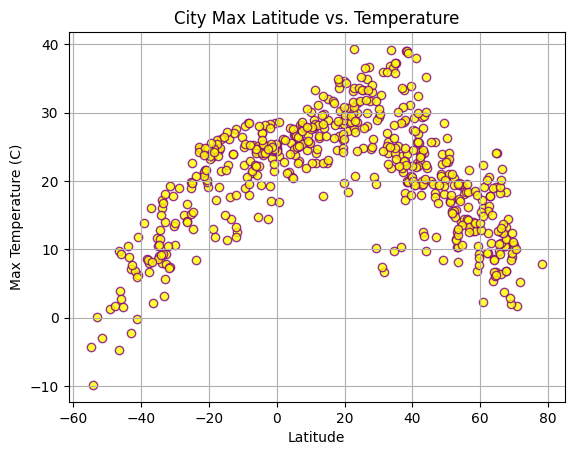

In [24]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"],facecolor="yellow", edgecolor="purple", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure, using a consistent path separator
plt.savefig("C:\RU GitHub Rep\python-api-challenge\WeatherPy\output_data\MyFig1.png")  # Use backslashes consistently

# Show plot
plt.show()

#### Latitude Vs. Humidity

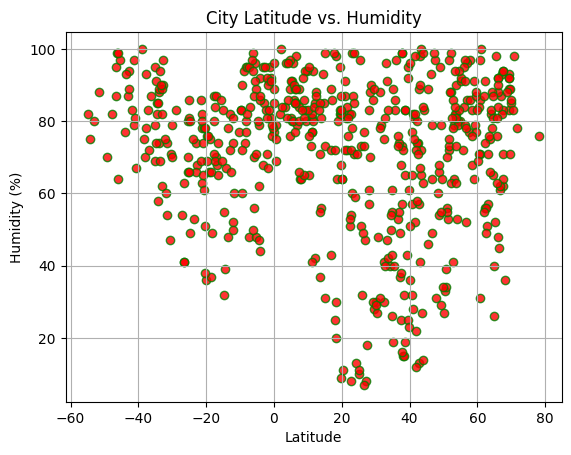

In [25]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"],facecolor="red", edgecolor="green", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure, using a consistent path separator
plt.savefig("C:\RU GitHub Rep\python-api-challenge\WeatherPy\output_data\MyFig2.png")  # Use backslashes consistently

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

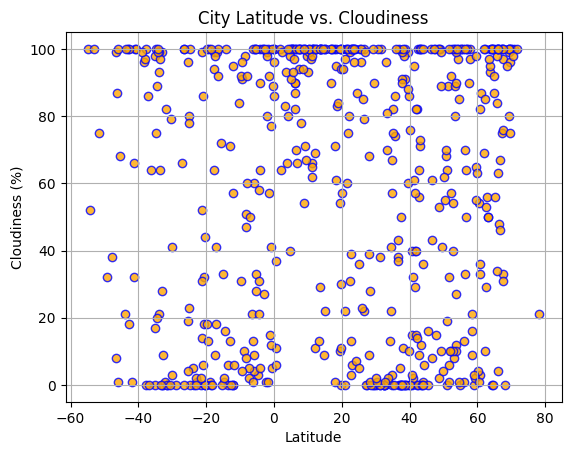

In [26]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"],facecolor="orange", edgecolor="blue", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure, using a consistent path separator
plt.savefig("C:\RU GitHub Rep\python-api-challenge\WeatherPy\output_data\MyFig3.png")  # Use backslashes consistently

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

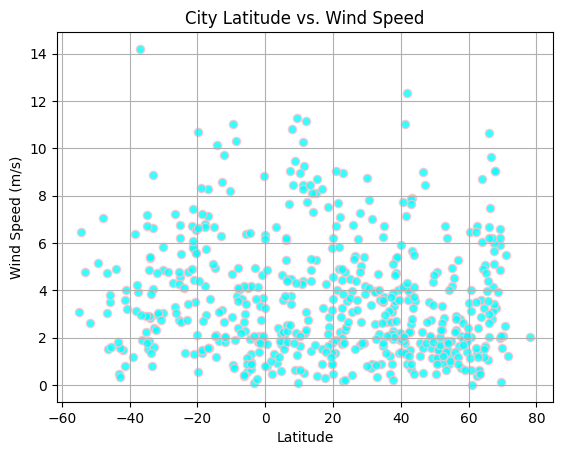

In [27]:

# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"],facecolor="cyan", edgecolor="pink", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure, using a consistent path separator
plt.savefig("C:\RU GitHub Rep\python-api-challenge\WeatherPy\output_data\MyFig4.png") # Use backslashes consistently

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [28]:

# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates):

    # Calculate the regression line slope and intercept
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

     # Add the regression line to the plot
    regression_value = x_values * slope + intercept

    # Add the equation of the line to the plot
    line_eq = "y =" +  str(round(slope, 2)) + "x+" + str(round(intercept, 2))

    # Add labels and a title to the plot
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Create a scatter plot of the x and y values
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regression_value, 'r-')
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')

    #Print out r value
    print(f'the r-value is: {rvalue**2}')

    # Show the plot
    plt.show()

In [32]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,novyy urgal,51.0736,132.5642,16.99,56,64,1.20,RU,1719266683
3,phan rang-thap cham,11.5667,108.9833,24.07,94,100,0.49,VN,1719266683
6,macapa,0.0389,-51.0664,25.46,85,100,6.34,BR,1719266684
7,maloye ganyushkino,46.6000,49.2667,25.75,64,61,9.01,KZ,1719266684
8,tejen,37.3834,60.5054,28.60,25,0,3.09,TM,1719266684


In [33]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,grytviken,-54.2811,-36.5092,-9.86,75,52,6.48,GS,1719266683
2,ushuaia,-54.8000,-68.3000,-4.24,82,100,3.09,AR,1719266669
4,port-aux-francais,-49.3500,70.2167,1.23,70,32,5.15,TF,1719266684
5,adamstown,-25.0660,-130.1015,22.60,86,80,6.76,PN,1719266684
9,west island,-12.1568,96.8225,27.57,74,95,9.71,CC,1719266684


###  Temperature vs. Latitude Linear Regression Plot

the r-value is: 0.45243789682568625


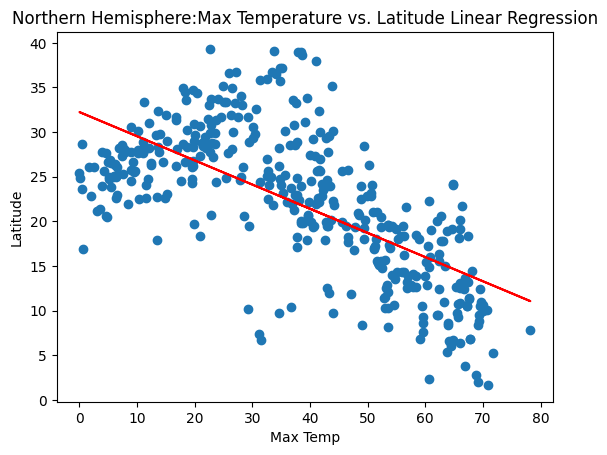

In [34]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
x_label = "Max Temp"
y_label = "Latitude"
title = "Northern Hemisphere:Max Temperature vs. Latitude Linear Regression"
text_coordinates = (6,-10)

plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates)

the r-value is: 0.6819423580559296


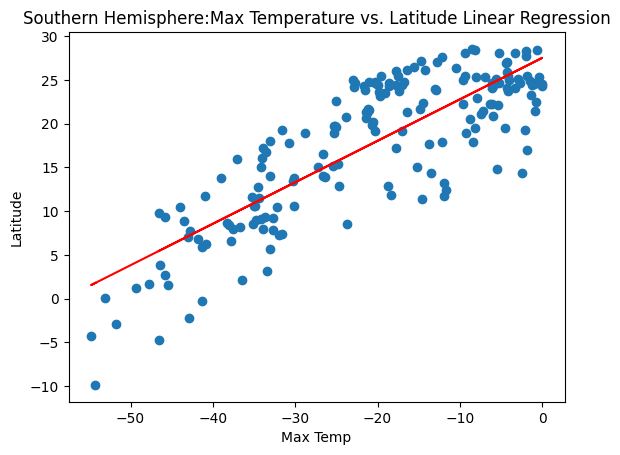

In [36]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
x_label = "Max Temp"
y_label = "Latitude"
title = "Southern Hemisphere:Max Temperature vs. Latitude Linear Regression"
text_coordinates = (-55,35)

plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates)

**Discussion about the linear relationship:** The futher from the equator, the lower the max temperature is. The northern hemisphere has a lower max temp than the southern hempisphere

### Humidity vs. Latitude Linear Regression Plot

the r-value is: 2.6811378028981576e-05


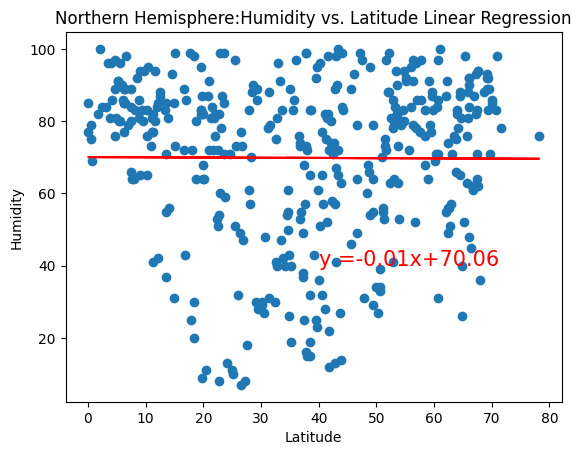

In [37]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
title = "Northern Hemisphere:Humidity vs. Latitude Linear Regression"
text_coordinates = (40,40)

plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates)

the r-value is: 0.005306820782288967


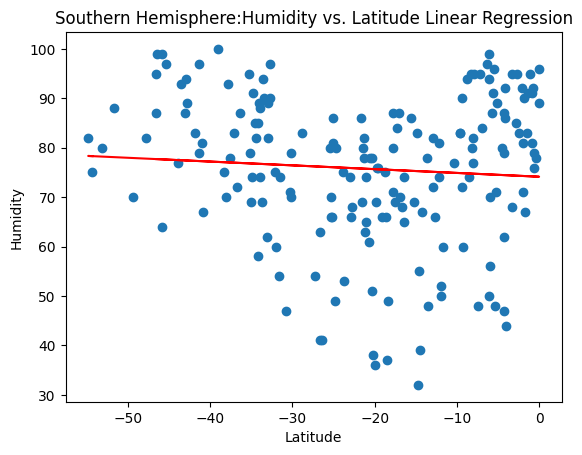

In [38]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
title = "Southern Hemisphere:Humidity vs. Latitude Linear Regression"
text_coordinates = (-50,20)

plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates)

:**Discussion about the linear relationship:**  Humidity range is about the same in both the northern and southern hemisphere

### Cloudiness vs. Latitude Linear Regression Plot

the r-value is: 0.015538558566745459


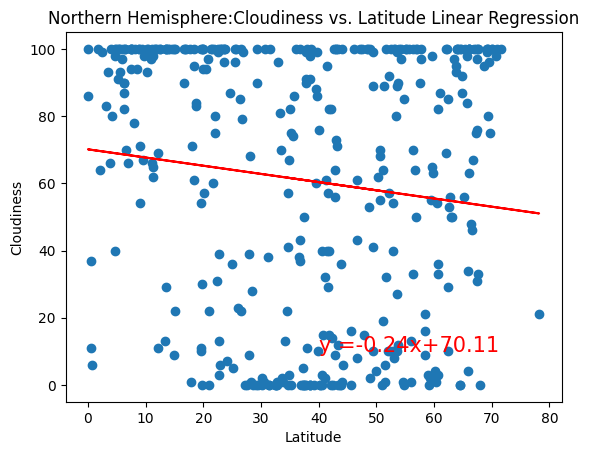

In [42]:


# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
title = "Northern Hemisphere:Cloudiness vs. Latitude Linear Regression"
text_coordinates = (40,10)

plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates)

the r-value is: 0.002967514605686662


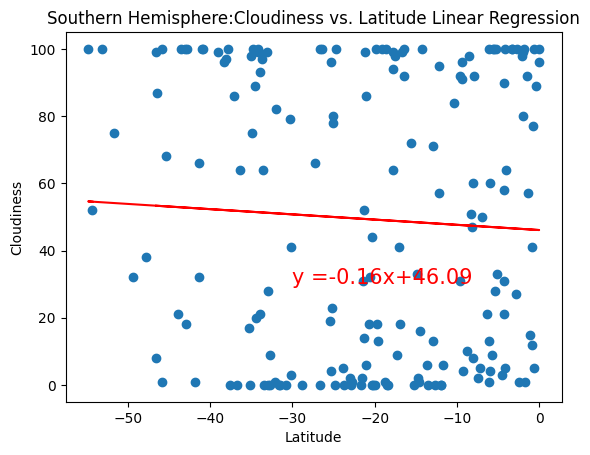

In [41]:

# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
title = "Southern Hemisphere:Cloudiness vs. Latitude Linear Regression"
text_coordinates = (-30,30)

plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates)

**Discussion about the linear relationship:** Coludiness range in the northern hemisphere is greater than in the southern hemisphere. It increases as you increase in latitude.

### Wind Speed vs. Latitude Linear Regression Plot

the r-value is: 0.014337421079265526


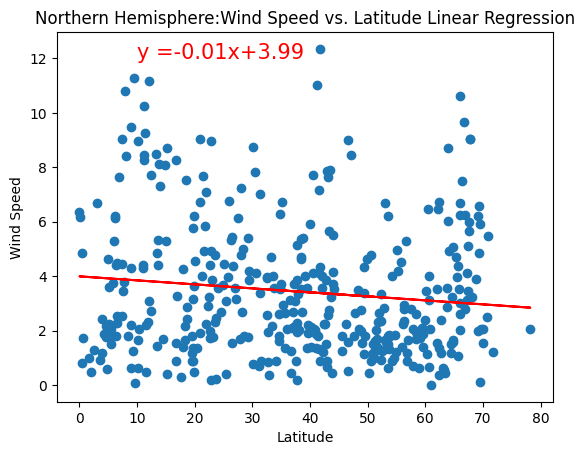

In [40]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
title = "Northern Hemisphere:Wind Speed vs. Latitude Linear Regression"
text_coordinates = (10,12)

plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates)

the r-value is: 0.007871713925148198


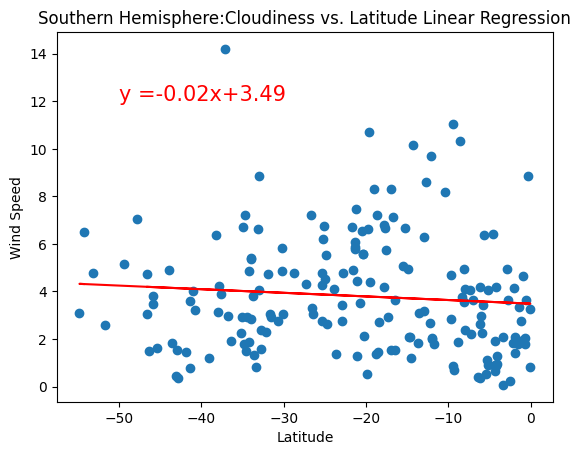

In [39]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
title = "Southern Hemisphere:Cloudiness vs. Latitude Linear Regression"
text_coordinates = (-50,12)

plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates)

\**Discussion about the linear

---

relationship:** Wind speed range does not vary much in the northern hemisphere and tends to increase the further down you go in the southern hemisphere